In [3]:
import os
import json

In [4]:
base_path = os.getcwd()
data_file_path = os.path.join(base_path, '20200607_data.json')

with open(data_file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

In [150]:
# 各 Category 分佈
cat_count = {
    0: 0,
    1: 0,
    2: 0,
    3: 0
}

for d in data:
    cat_count[d['Category']] += 1
    
cat_count

{0: 8360, 1: 5326, 2: 973, 3: 645}

In [153]:
# 複製資料

more_data = []

d0 = []
d1 = []
d2 = []
d3 = []

for d in data:
    if d['Category'] == 0:
        d0.append(d)
    elif d['Category'] == 1:
        d1.append(d)
    elif d['Category'] == 2:
        d2.append(d)
    elif d['Category'] == 3:
        d3.append(d)
        
more_data = d0 + 2*d1 + 10*d2 + 13*d3
len(more_data)

37127

In [120]:
# 讓各category平均一點

avg_data = []
threshold_count = 645
cat_count = {
    0: 0,
    1: 0,
    2: 0,
    3: 0
}

for d in data:
    if cat_count[d['Category']] < threshold_count:
        avg_data.append(d)
        cat_count[d['Category']] += 1

# sklearn

In [154]:
text = []
label = []

for d in more_data:
    text.append(d['Token'])
    label.append(d['Category'])

In [155]:
from sklearn import model_selection

# split the dataset into training and testing 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(text, label, test_size=0.1, random_state=1)

In [156]:
from sklearn.feature_extraction.text import TfidfVectorizer

# word level tf-idf
tfidf_vect = TfidfVectorizer(max_features=5000)
tfidf_vect.fit(train_x) # Learn vocabulary and idf from training data set. (in bad words)
xtrain_tfidf = tfidf_vect.transform(train_x) # compute tfidf for tranning data set
xvalid_tfidf = tfidf_vect.transform(valid_x) # compute tfidf for testing data set

In [157]:
# Display bag words
print(tfidf_vect.get_feature_names())

['03', '0919', '10', '10月', '10點', '11', '11月', '11點', '12', '12點', '13', '14', '15', '15日', '15號', '20', '2014', '2015', '2016年', '2017年', '2018年', '21世紀', '24', '25', '27', '30', '3月', '4月', '59', '5月', '6月', '75', '7月', '80', '85', '90', '9月', '9點', 'cp值', 'ctrl', 'eleven', 'nt', 'pin碼', 'po文', 'p值', 'qq糖', 'q口', 'q度', 'q彈', 'select', 't口', 'u型', '一丁點', '一下', '一下子', '一下版', '一大早', '一定', '一時', '一會', '一會兒', '一瞬間', '一般人', '一角', '一貫', '一陣', '一陣子', '一體', '七七', '七味粉', '三思', '三明治', '三更半夜', '三杯', '三杯雞', '三矢', '三福', '三角', '三角形', '三重', '三重奏', '三鮮丼', '三麗鷗', '三麥', '三點', '上官網', '上方', '上板', '上架', '上桌', '上款', '上游', '上班', '上班族', '上網', '上色', '上蓋', '上課', '上貨', '上述', '上面', '上頭', '下不了', '下午', '下午茶', '下去', '下嚥', '下定決心', '下手', '下方', '下架', '下班', '下肚', '下載', '下酒菜', '下降', '下雨', '下雨天', '下面', '不久', '不予置評', '不倒翁', '不到', '不及', '不同於', '不失', '不符', '不適感', '不雷', '不顧', '世文', '世界', '丟到', '丟掉', '丟進', '丟進去', '中上', '中午', '中和', '中國', '中央', '中式', '中心', '中文', '中村', '中杯', '中秋節', '中等', '中華', '中藥', '中藥味', '中間', '中餐', '丸子', '丹麥

## tree

In [158]:
from sklearn import tree,  metrics

classifier_tree = tree.DecisionTreeClassifier(random_state=1)
# fit the training dataset on the classifier
classifier_tree =classifier_tree.fit(xtrain_tfidf, train_y)

# predict the labels on validation dataset
valid_y_pred_tree = classifier_tree.predict(xvalid_tfidf)
accuracy_tree = metrics.accuracy_score(valid_y, valid_y_pred_tree)
confusion_matrix_tree = metrics.confusion_matrix(valid_y, valid_y_pred_tree, labels=[0,1,2,3])

print ("Accuracy", accuracy_tree)
print ("confusion_matrix\n", confusion_matrix_tree)

Accuracy 0.858066253703205
confusion_matrix
 [[439 334  61  38]
 [ 49 992   8   7]
 [  0   2 937  25]
 [  0   0   3 818]]


In [128]:
print("precision for class 1", metrics.precision_score(valid_y, valid_y_pred_tree, pos_label=0, average='macro'))
print("precision for class 2", metrics.precision_score(valid_y, valid_y_pred_tree, pos_label=1, average='macro'))
print("precision for class 3", metrics.precision_score(valid_y, valid_y_pred_tree, pos_label=2, average='macro'))
print("precision for class 4", metrics.precision_score(valid_y, valid_y_pred_tree, pos_label=3, average='macro'))

# print("recall for class Negative", metrics.recall_score(valid_y, valid_y_pred_tree, pos_label=0))
# print("recall for class Positive", metrics.recall_score(valid_y, valid_y_pred_tree, pos_label=1))    

precision for class 1 0.33553131481084175
precision for class 2 0.33553131481084175
precision for class 3 0.33553131481084175
precision for class 4 0.33553131481084175


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1317: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1317: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1317: UserWarning: Note that pos_label (set to 3) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


//anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20498 missing from current font.
  font.set_text(s, 0.0, flags=flags)
//anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25481 missing from current font.
  font.set_text(s, 0.0, flags=flags)
//anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26410 missing from current font.
  font.set_text(s, 0.0, flags=flags)
//anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28415 missing from current font.
  font.set_text(s, 0.0, flags=flags)
//anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25972 missing from current font.
  font.set_text(s, 0.0, flags=flags)
//anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 39636 missing from current font.
  fon

[Text(780.5357142857143, 815.4, '倒掉 <= 0.077\ngini = 0.75\nsamples = 2322\nvalue = [585, 577, 570, 590]\nclass = 3'),
 Text(431.7857142857143, 634.2, '未滿 <= 0.228\ngini = 0.75\nsamples = 2284\nvalue = [585, 577, 565, 557]\nclass = 0'),
 Text(265.7142857142857, 453.0, '整體 <= 0.008\ngini = 0.749\nsamples = 2215\nvalue = [584, 575, 544, 512]\nclass = 0'),
 Text(132.85714285714286, 271.80000000000007, '東西 <= 0.057\ngini = 0.75\nsamples = 1954\nvalue = [482, 485, 497, 490]\nclass = 2'),
 Text(66.42857142857143, 90.60000000000002, '\n  (...)  \n'),
 Text(199.28571428571428, 90.60000000000002, '\n  (...)  \n'),
 Text(398.57142857142856, 271.80000000000007, '結論 <= 0.018\ngini = 0.689\nsamples = 261\nvalue = [102, 90, 47, 22]\nclass = 0'),
 Text(332.14285714285717, 90.60000000000002, '\n  (...)  \n'),
 Text(465.0, 90.60000000000002, '\n  (...)  \n'),
 Text(597.8571428571429, 453.0, '推薦 <= 0.284\ngini = 0.481\nsamples = 69\nvalue = [1, 2, 21, 45]\nclass = 3'),
 Text(531.4285714285714, 271.800000

//anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26481 missing from current font.
  font.set_text(s, 0, flags=flags)
//anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 35199 missing from current font.
  font.set_text(s, 0, flags=flags)
//anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 32080 missing from current font.
  font.set_text(s, 0, flags=flags)
//anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 35542 missing from current font.
  font.set_text(s, 0, flags=flags)
//anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 21619 missing from current font.
  font.set_text(s, 0, flags=flags)
//anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 35258 missing from current font.
  font.set_text

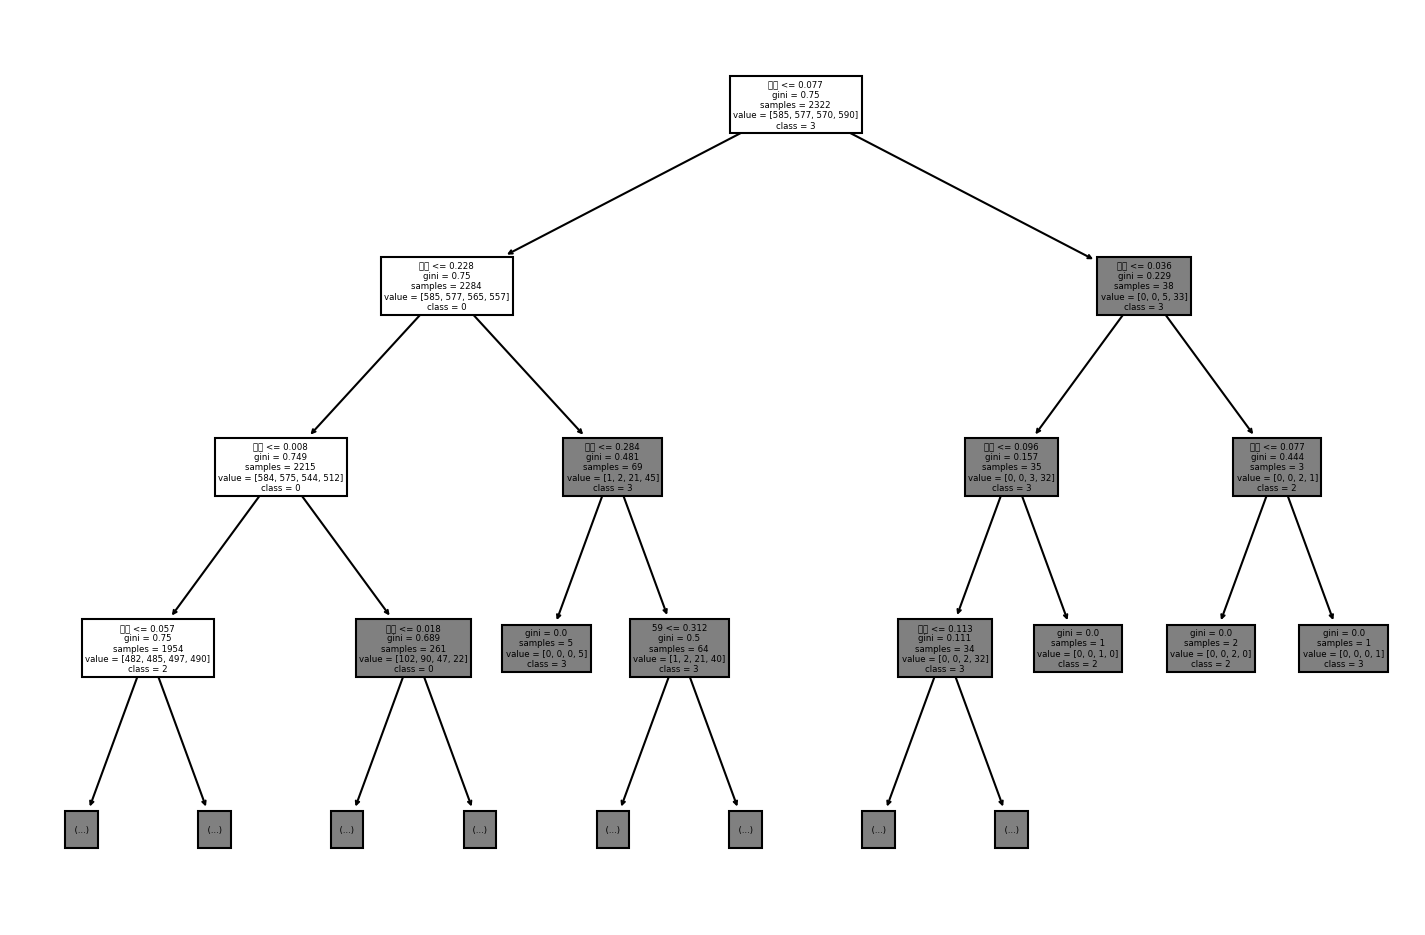

In [130]:
import matplotlib.pyplot as plt
plt.figure( figsize=(12, 8), dpi=150, facecolor='w', edgecolor='k')
tree.plot_tree(classifier_tree, max_depth=3, feature_names=tfidf_vect.get_feature_names(),class_names=['0','1','2','3'])

## Random Forest

In [131]:
from sklearn import ensemble

classifier_rf = ensemble.RandomForestClassifier(random_state= 1)
# fit the training dataset on the classifier
classifier_rf.fit(xtrain_tfidf, train_y)

# predict the labels on validation dataset
valid_y_pred_rf = classifier_rf.predict(xvalid_tfidf)

accuracy_rf = metrics.accuracy_score(valid_y, valid_y_pred_rf)
confusion_matrix_rf = metrics.confusion_matrix(valid_y, valid_y_pred_rf, labels=[0,1,2,3])
print ("Accuracy", accuracy_rf)
print ("confusion_matrix\n", confusion_matrix_rf)

Accuracy 0.40310077519379844
confusion_matrix
 [[28 13 10  9]
 [23 19 12 14]
 [14 20 19 22]
 [ 5  5  7 38]]


## Neural Network

In [132]:
from sklearn.neural_network import MLPClassifier

classifier_nn = MLPClassifier(hidden_layer_sizes=(5,), random_state=1)

# fit the training dataset on the classifier
classifier_nn.fit(xtrain_tfidf, train_y)

# predict the labels on validation dataset
valid_y_pred_nn = classifier_nn.predict(xvalid_tfidf)

accuracy_nn = metrics.accuracy_score(valid_y, valid_y_pred_nn)
confusion_matrix_nn = metrics.confusion_matrix(valid_y, valid_y_pred_nn, labels=[0,1,2,3])

print ("Accuracy", accuracy_nn)
print ("confusion_matrix\n", confusion_matrix_nn)

Accuracy 0.35658914728682173
confusion_matrix
 [[22 19  9 10]
 [20 17 16 15]
 [22 13 22 18]
 [ 4  6 14 31]]


//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Keras

In [159]:
text = []
label = []

for d in more_data:
    text.append(d['Token'])
    label.append(d['Category'])

In [160]:
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer

max_words = 500

# 建立token
token = Tokenizer(num_words=max_words)
token.fit_on_texts(text)

In [161]:
print(token.document_count)
print(token.word_index)

37127
{'味道': 1, '口味': 2, '沒有': 3, '口感': 4, '感覺': 5, '包裝': 6, '巧克力': 7, '一下': 8, '今天': 9, '裡面': 10, '商品': 11, '飲料': 12, '麵包': 13, '吃完': 14, '吃到': 15, '打開': 16, '東西': 17, '奶茶': 18, '11': 19, '7': 20, '整體': 21, '買來': 22, '店員': 23, '咖啡': 24, '產品': 25, '微波': 26, '回購': 27, '比較': 28, '內容': 29, '最後': 30, '起司': 31, '價格': 32, '牛奶': 33, '推薦': 34, '現在': 35, '草莓': 36, '搭配': 37, '紅茶': 38, '飯糰': 39, '份量': 40, '系列': 41, '便當': 42, '熱量': 43, '上面': 44, '加熱': 45, '醬汁': 46, '超商': 47, '全家': 48, '最近': 49, '奶油': 50, '朋友': 51, '內容物': 52, '接受': 53, '霜淇淋': 54, '雞肉': 55, '蛋糕': 56, '餅乾': 57, '喝完': 58, '調味': 59, '小七': 60, '香氣': 61, '特價': 62, '推出': 63, '茶味': 64, '評價': 65, '便利商店': 66, '內餡': 67, '看看': 68, '香味': 69, '檸檬': 70, '心得': 71, '入口': 72, '早餐': 73, '分享': 74, '中間': 75, '布丁': 76, '顏色': 77, '日本': 78, '萊爾富': 79, '甜味': 80, '冰淇淋': 81, '結論': 82, '結帳': 83, '圖片': 84, '印象': 85, '甜度': 86, '價錢': 87, '選擇': 88, '咖哩': 89, '文字': 90, '照片': 91, '原味': 92, '以前': 93, '蜂蜜': 94, '紅豆': 95, '買到': 96, '牛肉': 97, '風味': 98, '麵條': 99, '回家': 

In [162]:
max_len = 30

text_seq = token.texts_to_sequences(text) # 把text轉為數字list
train_text = sequence.pad_sequences(text_seq, maxlen=max_len) # 讓每筆list長度都一樣

In [163]:
# one-hot encoding mark
from keras.utils import np_utils

label_oneHot = np_utils.to_categorical(label)
print(label_oneHot)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [167]:
# model

from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM

def LSTMClassifier():
    model = Sequential()
    model.add(Embedding(output_dim=10, input_dim=max_words, input_length=max_len))
    model.add(LSTM(32))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=4, activation='softmax'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [168]:
model = LSTMClassifier()
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_20 (Embedding)     (None, 30, 10)            5000      
_________________________________________________________________
lstm_19 (LSTM)               (None, 32)                5504      
_________________________________________________________________
dense_50 (Dense)             (None, 128)               4224      
_________________________________________________________________
dropout_24 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_52 (Dense)             (None, 4)                 516       
Total params: 31,756
Trainable params: 31,756
Non-trainable params: 0
_________________________________________________

In [173]:
# 開始訓練
# 打散資料: shuffle=True,
train_history = model.fit(train_text, label_oneHot, batch_size=256, epochs=20, verbose=2, shuffle=True, validation_split=0.1)

Train on 33414 samples, validate on 3713 samples
Epoch 1/20
 - 13s - loss: 0.3108 - accuracy: 0.8525 - val_loss: 0.3232 - val_accuracy: 0.8414
Epoch 2/20
 - 14s - loss: 0.3021 - accuracy: 0.8561 - val_loss: 0.2874 - val_accuracy: 0.8510
Epoch 3/20
 - 14s - loss: 0.2949 - accuracy: 0.8586 - val_loss: 0.2776 - val_accuracy: 0.8850
Epoch 4/20
 - 15s - loss: 0.2938 - accuracy: 0.8587 - val_loss: 0.2966 - val_accuracy: 0.8634
Epoch 5/20
 - 19s - loss: 0.2840 - accuracy: 0.8619 - val_loss: 0.2712 - val_accuracy: 0.8912
Epoch 6/20
 - 18s - loss: 0.2822 - accuracy: 0.8620 - val_loss: 0.2199 - val_accuracy: 0.9069
Epoch 7/20
 - 17s - loss: 0.2816 - accuracy: 0.8622 - val_loss: 0.2365 - val_accuracy: 0.8855
Epoch 8/20
 - 17s - loss: 0.2765 - accuracy: 0.8634 - val_loss: 0.2209 - val_accuracy: 0.9098
Epoch 9/20
 - 17s - loss: 0.2715 - accuracy: 0.8663 - val_loss: 0.3243 - val_accuracy: 0.8599
Epoch 10/20
 - 17s - loss: 0.2730 - accuracy: 0.8658 - val_loss: 0.2403 - val_accuracy: 0.8675
Epoch 11/2

In [174]:
import matplotlib.pyplot as plt

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

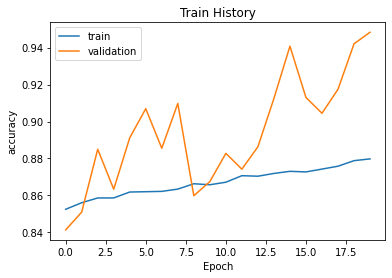

In [175]:
# 畫出accuracy執行結果
show_train_history(train_history, 'accuracy', 'val_accuracy')

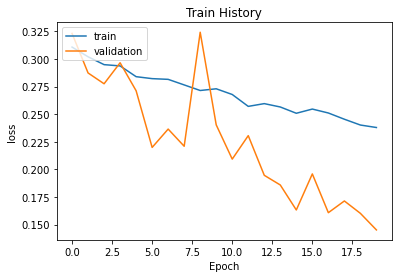

In [176]:
# 畫出loss誤差執行結果
show_train_history(train_history, 'loss', 'val_loss')